# Salary Income Prediction

Kalila Lin

#### Project Description

This project aims to predict income based on demographic and socioeconomic factors. It involves exploring and preparing the data using pandas, visualizing distributions and relationships, and encoding categorical variables while normalizing numerical ones. 

The dataset's imbalance is addressed through SMOTE. Models like SVM, Naive Bayes, and Logistic Regression are built and evaluated to achieve accurate predictions.

### Load & Review Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
df = pd.read_csv('./income_evaluation-1.csv')

In [3]:
#return the first n of rows of the dataframe
df.head(10)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


In [4]:
#rows and columns of the dataframe
df.shape

(32561, 15)

In [5]:
#provides a summary of the dataframe, including the number of 
#non-null values in each column, the data type of each column, 
#and the memory usage of the dataframe. 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              32561 non-null  int64 
 1    workclass       32561 non-null  object
 2    fnlwgt          32561 non-null  int64 
 3    education       32561 non-null  object
 4    education-num   32561 non-null  int64 
 5    marital-status  32561 non-null  object
 6    occupation      32561 non-null  object
 7    relationship    32561 non-null  object
 8    race            32561 non-null  object
 9    sex             32561 non-null  object
 10   capital-gain    32561 non-null  int64 
 11   capital-loss    32561 non-null  int64 
 12   hours-per-week  32561 non-null  int64 
 13   native-country  32561 non-null  object
 14   income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [6]:
df.columns

Index(['age', ' workclass', ' fnlwgt', ' education', ' education-num',
       ' marital-status', ' occupation', ' relationship', ' race', ' sex',
       ' capital-gain', ' capital-loss', ' hours-per-week', ' native-country',
       ' income'],
      dtype='object')

The names of the columns have a 1 space on the starting of their name so we need to take care of this

In [7]:
#used to find the unique elements in a numpy array
np.unique(df[' income'])

array([' <=50K', ' >50K'], dtype=object)

In [8]:
np.unique(df[' marital-status'])

array([' Divorced', ' Married-AF-spouse', ' Married-civ-spouse',
       ' Married-spouse-absent', ' Never-married', ' Separated',
       ' Widowed'], dtype=object)

### Data cleaning

Let's first remove the unecessary columns and that 1 space which is there 

In [9]:
#remove unnecessary columns
df.drop(columns=' fnlwgt',inplace=True)

In [10]:
df.columns

Index(['age', ' workclass', ' education', ' education-num', ' marital-status',
       ' occupation', ' relationship', ' race', ' sex', ' capital-gain',
       ' capital-loss', ' hours-per-week', ' native-country', ' income'],
      dtype='object')

Unnecessary column is removed from dataset.

We can see that the dataset does not have proper column names. The column names should contain underscore instead of "hyphen-minus". We should give proper names to the columns. I will do it as follows:-

In [11]:
col_names = ['age', 'workclass', 'education', 'education_num', 'marital_status', 'occupation', 'relationship',
             'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country', 'income']

df.columns = col_names

df.columns

Index(['age', 'workclass', 'education', 'education_num', 'marital_status',
       'occupation', 'relationship', 'race', 'sex', 'capital_gain',
       'capital_loss', 'hours_per_week', 'native_country', 'income'],
      dtype='object')

Now we shall check whether the dataset has null values, if so, then we shall remove it.

In [12]:
#checking for null values
df.isnull().sum()

age               0
workclass         0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

No null value found.

### Data Pre-processing

#### 1. Add columns

Let's create a new categorical column called 'age_types' in the DataFrame (df) based on the 'age' column. It bins the ages into different groups defined by the 'bins' list: [16-24), [24-64), and [64-90). 

Then, it assigns labels 'young', 'adult', and 'old' respectively to these age groups.

In [13]:
# adding new the categorical column
bins = [16, 24, 64, 90]
labels = ["young","adult","old"]
df['age_types'] = pd.cut(df['age'], bins=bins, labels=labels)

############### OPTION 1: creates a new column called 'income_num' in 
#a pandas DataFrame (df) based on the values in an existing column 
#called 'income'. The np.where function creates an array of the same 
#shape as the specified column ('income') and returns a value of 1 if 
#the condition df['income'] == ' >50K' is true and 0 otherwise. 
#The resulting values are then cast to integer data type with type 
#int16 using the astype method.
df['income_num'] = np.where(df['income'] == ' >50K', 1, 0).astype('int16')

################ OPTION 2: change content one by one
#copy an existen columns and add into dataframe
# df['income_num'] = df['income'].copy()

# df.loc[df['income_num']==' <=50K', 'income_num']= 0
# df.loc[df['income_num']==' >50K', 'income_num']= 1

################# OPTION 3: if there are many 
# a=[]

# for income in df['income']:
#     if income == ' <=50K':
#         a.append(0)
#     else:
#         a.append(1)
# df['income_num'] = a

Let's double check the dataframe and see whethere the columns are added.

In [14]:
df.head(10)

,age,workclass,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income,age_types,income_num
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,adult,0
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,adult,0
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,adult,0
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,adult,0
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,adult,0
5,37,Private,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K,adult,0
6,49,Private,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K,adult,0
7,52,Self-emp-not-inc,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K,adult,1
8,31,Private,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K,adult,1
9,42,Private,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K,adult,1


Great! Scroll right and you would see the two new columns are added.

#### 2. Fix inconsistent/error data

Oops! Have you seen the space before these values? That's not good!

In [15]:
np.unique(df.education)

array([' 10th', ' 11th', ' 12th', ' 1st-4th', ' 5th-6th', ' 7th-8th',
       ' 9th', ' Assoc-acdm', ' Assoc-voc', ' Bachelors', ' Doctorate',
       ' HS-grad', ' Masters', ' Preschool', ' Prof-school',
       ' Some-college'], dtype=object)

In [16]:
df.columns

Index(['age', 'workclass', 'education', 'education_num', 'marital_status',
       'occupation', 'relationship', 'race', 'sex', 'capital_gain',
       'capital_loss', 'hours_per_week', 'native_country', 'income',
       'age_types', 'income_num'],
      dtype='object')

We shall strip all the spaces of the columns using str.strip() function.

In [17]:
strip_columns = ['workclass', 'education','marital_status',
       'occupation', 'relationship', 'race', 'sex','native_country', 'income']


In [18]:
#strip spaces in all columns
#The code you've provided strips whitespace characters from each string in the ith column of a pandas DataFrame (df). The str 
#property of a pandas series allows you to access the string methods available in Python, such as strip, which removes any 
#leading or trailing whitespaces. This operation updates the values in place for the specified column.
for i in strip_columns:
    df[i] = df[i].str.strip()
print('testing')
print(df['sex'][1])

testing
Male


In [19]:
np.unique(df.workclass)

array(['?', 'Federal-gov', 'Local-gov', 'Never-worked', 'Private',
       'Self-emp-inc', 'Self-emp-not-inc', 'State-gov', 'Without-pay'],
      dtype=object)

#### 3. Find Categorical Values and Numerical Values

In [20]:
categorical = [var for var in df.columns if df[var].dtype=='O']

print('There are {} categorical variables\n'.format(len(categorical)))

print('The categorical variables are :\n\n', categorical)

There are 9 categorical variables

The categorical variables are :

 ['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'native_country', 'income']


In [21]:
numerical = [var_1 for var_1 in df.columns if df[var_1].dtype=='int64']

print('There are {} numerical variables\n'.format(len(numerical)))

print('The numerical variables are :\n\n', numerical)

There are 5 numerical variables

The numerical variables are :

 ['age', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week']


#### 4. Find missing values

In [22]:
for var in categorical: 
    
    print(df[var].value_counts())

Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64
HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: education, dtype: int64
Married-civ-spouse       14976
Never-married            10683
Divorced                  4443
Separated                 1025
Widowed                    993
Married-spouse-absent      418
Married-AF-spouse           23
Name: marital_status, dtype: int64
Prof-specialty       4140
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         377

Now, we can see that there are several columns like workclass, occupation and native_country which contain missing values. Let's recheck it with the 'loc' operator.

In [23]:
df.loc[df['workclass']=='?']

,age,workclass,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income,age_types,income_num
27,54,?,Some-college,10,Married-civ-spouse,?,Husband,Asian-Pac-Islander,Male,0,0,60,South,>50K,adult,1
61,32,?,7th-8th,4,Married-spouse-absent,?,Not-in-family,White,Male,0,0,40,?,<=50K,adult,0
69,25,?,Some-college,10,Never-married,?,Own-child,White,Male,0,0,40,United-States,<=50K,adult,0
77,67,?,10th,6,Married-civ-spouse,?,Husband,White,Male,0,0,2,United-States,<=50K,old,0
106,17,?,10th,6,Never-married,?,Own-child,White,Female,34095,0,32,United-States,<=50K,young,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32530,35,?,Bachelors,13,Married-civ-spouse,?,Wife,White,Female,0,0,55,United-States,>50K,adult,1
32531,30,?,Bachelors,13,Never-married,?,Not-in-family,Asian-Pac-Islander,Female,0,0,99,United-States,<=50K,adult,0
32539,71,?,Doctorate,16,Married-civ-spouse,?,Husband,White,Male,0,0,10,United-States,>50K,old,1
32541,41,?,HS-grad,9,Separated,?,Not-in-family,Black,Female,0,0,32,United-States,<=50K,adult,0


There are a good amount of rows where workclass, native country and occupation column have no value maybe it was because these people were not comfortable sharing this information . We can either remove these rows or make their value equals to NaN (Not a Number). I will go for the second option because we may miss out important datapoints by deleting the rows.

In [24]:
#Use loc() to select the row where value is ? and replace it 
#with np.Nan means not a number
df.loc[df['workclass']=='?', 'workclass']= np.NaN
#another approach
#df['workclass'].replace(' ?', np.NaN, inplace=True)

df.loc[df['occupation']=='?', 'occupation']= np.NaN
#another approach
#df['occupation'].replace(' ?', np.NaN, inplace=True)

df.loc[df['native_country']=='?', 'native_country']= np.NaN
#another approach
#df['native_country'].replace(' ?', np.NaN, inplace=True)

In [25]:
#count of values of workclass and see if any ? left
df.workclass.value_counts()

Private             22696
Self-emp-not-inc     2541
Local-gov            2093
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64

In [26]:
#now we can see how many missing values
df.isnull().sum()

age                  0
workclass         1836
education            0
education_num        0
marital_status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital_gain         0
capital_loss         0
hours_per_week       0
native_country     583
income               0
age_types            0
income_num           0
dtype: int64

We have cleanned all the error and/or missing data! Let's visualise the data!

### Data visualisation

In [27]:
df.head()

,age,workclass,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income,age_types,income_num
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,adult,0
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,adult,0
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,adult,0
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,adult,0
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,adult,0


Income is our target variable, let's start with it!

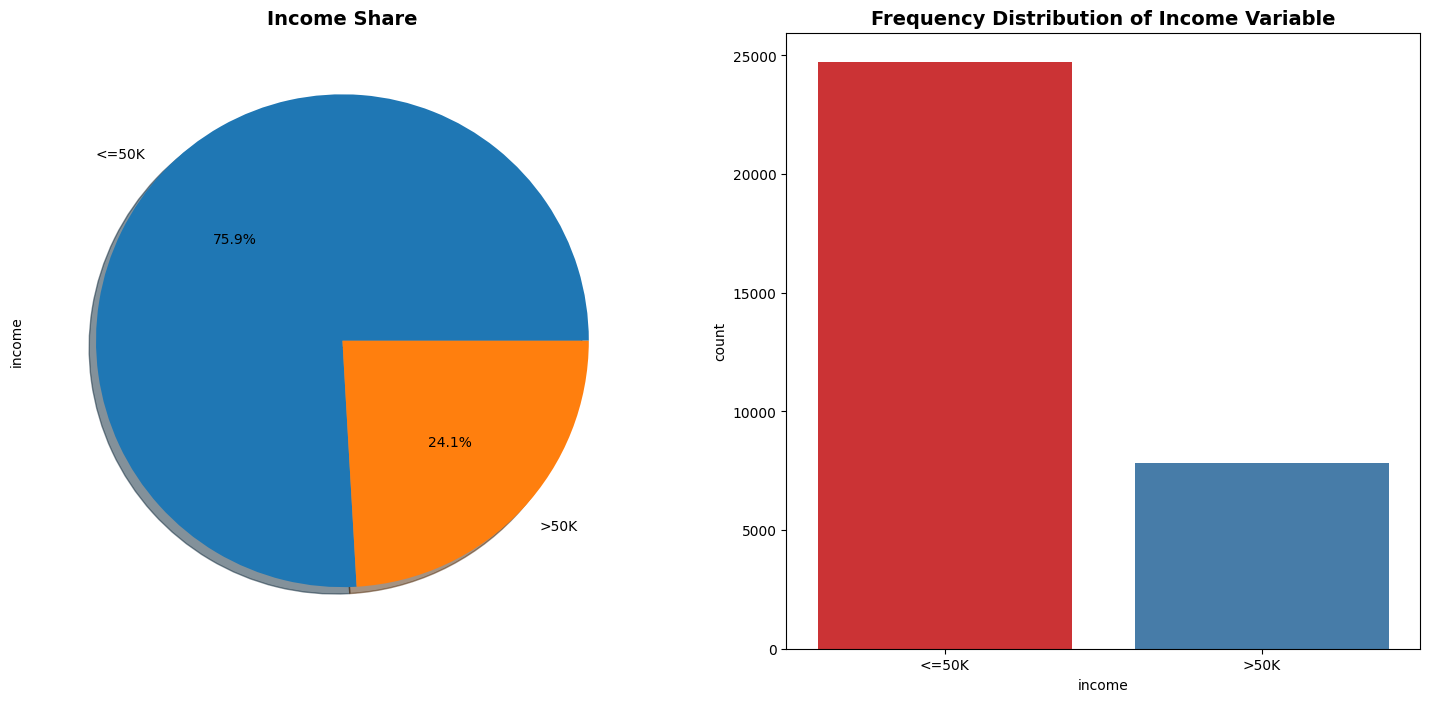

In [31]:
#Create a figure and axes with specific size
fig, ax = plt.subplots(1, 2, figsize=(18, 8))

#Plot a pie chart for income distribution
ax[0] = df['income'].value_counts().plot.pie(explode=[0, 0], autopct='%1.1f%%', ax=ax[0], shadow=True)
ax[0].set_title('Income Share', fontweight='bold', fontsize=14)  # Add a bold title

#Plot a count plot for income variable
ax[1] = sns.countplot(x="income", data=df, palette="Set1", ax=ax[1])
ax[1].set_title("Frequency Distribution of Income Variable", fontweight='bold', fontsize=14)  #Add a bold title

plt.show()

In [34]:
#count how many and divide the len to get the % of each
df['income'].value_counts()/len(df)

<=50K    0.75919
>50K     0.24081
Name: income, dtype: float64

In [33]:
#now we can see how many rows is >50k and <=50k
more_than_50 = df[df['income'] == '>50K']
less_than_50 = df[df['income'] == '<=50K']
print (more_than_50.shape,less_than_50.shape)

(7841, 16) (24720, 16)


We can see that 75% of the dataset consists of people with less than 50k income, while 25% comprises individuals with higher earnings. This dataset is highly imbalanced, which could significantly bias our machine learning output. We'll need to address this imbalance after completing the visualization of the dataset.

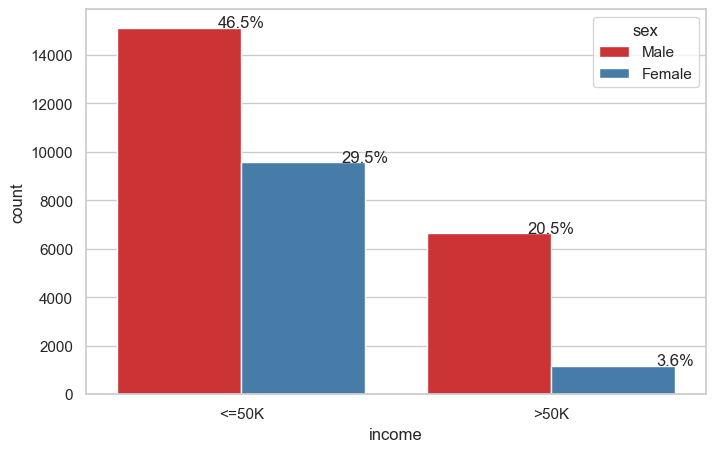

In [37]:
sns.set(style="whitegrid")
plt.figure(figsize=(8, 5))
total = float(len(df))
ax = sns.countplot(x="income", hue="sex", data=df, palette='Set1')

for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center')

plt.show()


Male's seems to earn more than female in both the income categories

In [38]:
df.columns

Index(['age', 'workclass', 'education', 'education_num', 'marital_status',
       'occupation', 'relationship', 'race', 'sex', 'capital_gain',
       'capital_loss', 'hours_per_week', 'native_country', 'income',
       'age_types', 'income_num'],
      dtype='object')

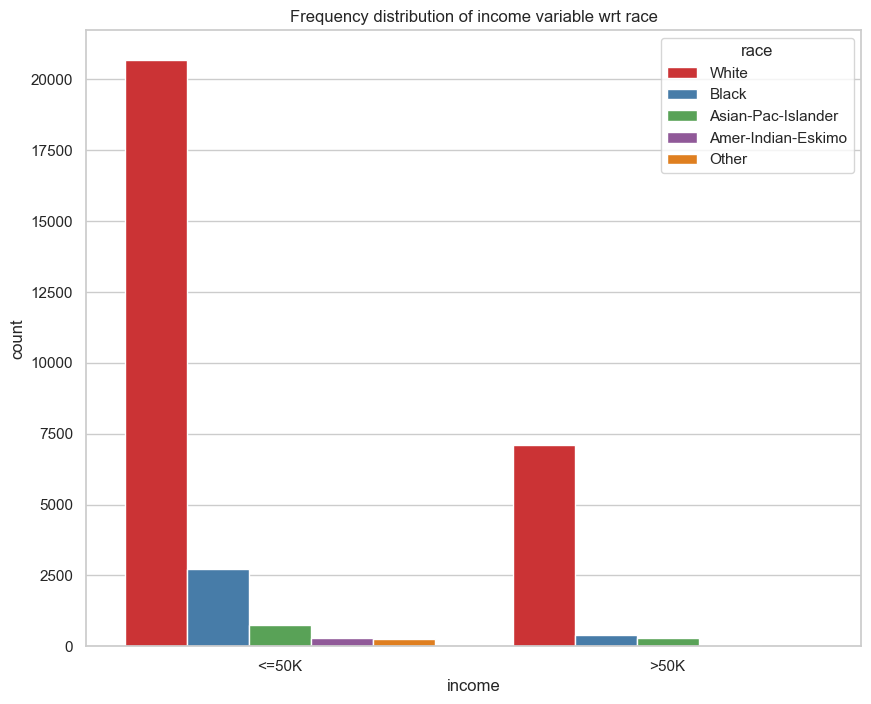

In [42]:
f, ax = plt.subplots(figsize=(10, 8))
ax = sns.countplot(x="income", hue="race", data=df, palette="Set1")
ax.set_title("Frequency distribution of income variable wrt race")
plt.show()

This chart shows income distribution by race, with significant disparities evident. White individuals dominate both income brackets, especially >$50K, highlighting racial inequalities in economic status.

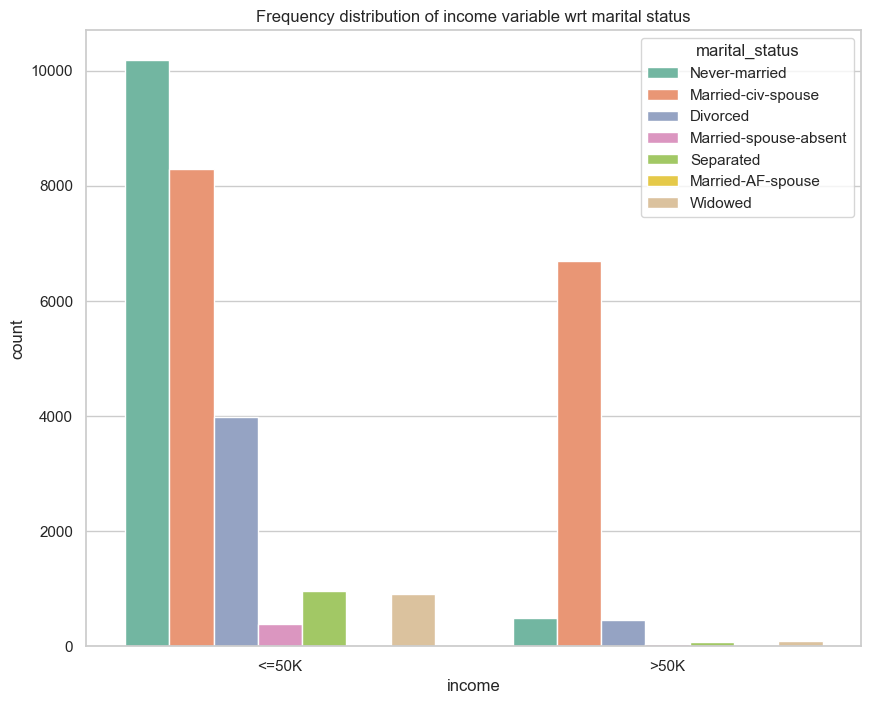

In [44]:
f, ax = plt.subplots(figsize=(10, 8))
#Do a similar plot with marital status
ax = sns.countplot(x="income", hue="marital_status", data=df, palette="Set2")
ax.set_title("Frequency distribution of income variable wrt marital status")
plt.show()

This chart illustrates income distribution by marital status, showing higher counts of never-married and married-civ-spouse individuals in both income brackets, with marked disparities in economic status across different marital statuses.

In [45]:
df.head()

,age,workclass,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income,age_types,income_num
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,adult,0
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,adult,0
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,adult,0
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,adult,0
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,adult,0


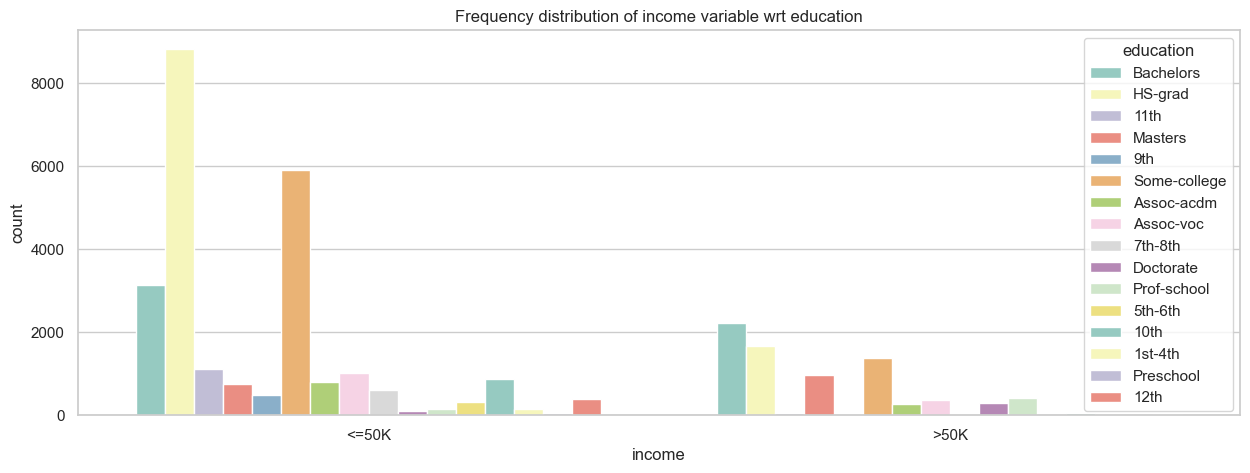

In [46]:
f, ax = plt.subplots(figsize=(15, 5))
#same for education
ax = sns.countplot(x="income", hue="education", data=df, palette="Set3")
ax.set_title("Frequency distribution of income variable wrt education")
plt.show()

This chart depicts income distribution by educational attainment. It shows a diverse range of educational backgrounds among those earning below and above $50K. High school graduates and those with some college education dominate the lower income bracket, while higher degrees like Bachelors and Masters show increased presence in the higher income bracket, illustrating the impact of education on earning potential.

In [49]:
#This code creates temp_2, a DataFrame subset of high school graduates earning more than $50K from the original df.
temp_2 = df.loc[(df['income']=='>50K') & (df['education'] == 'HS-grad')]

<AxesSubplot: xlabel='marital_status', ylabel='count'>

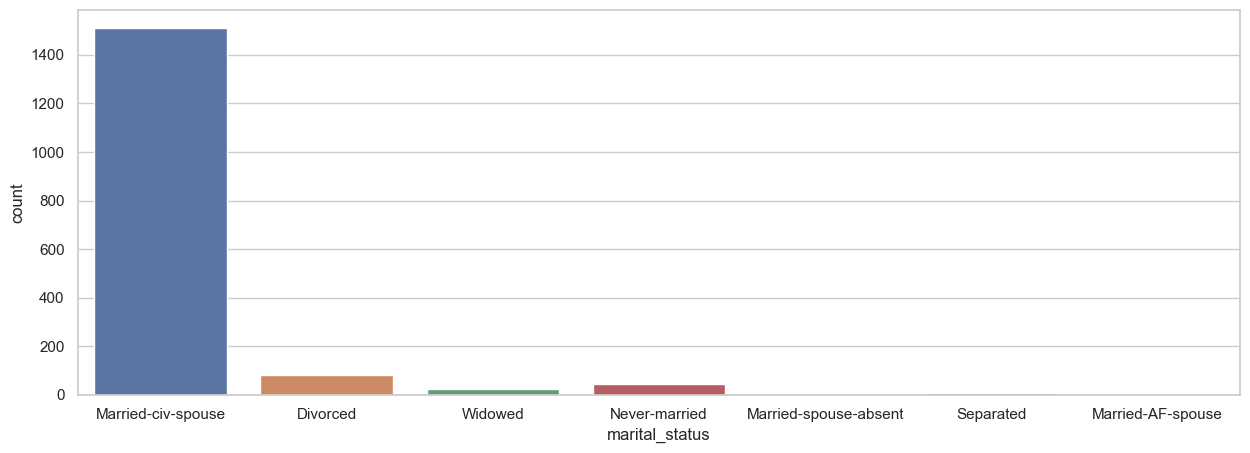

In [50]:
#Let's review this subset
plt.figure(figsize=(15,5))
sns.countplot(x='marital_status',data=temp_2)

This chart displays the count of individuals by marital status. "Married-civ-spouse" is the most common status, with other categories like "Divorced" and "Never-married" significantly lower.

### 1. I suspect outliers!

#### Numerical Columns

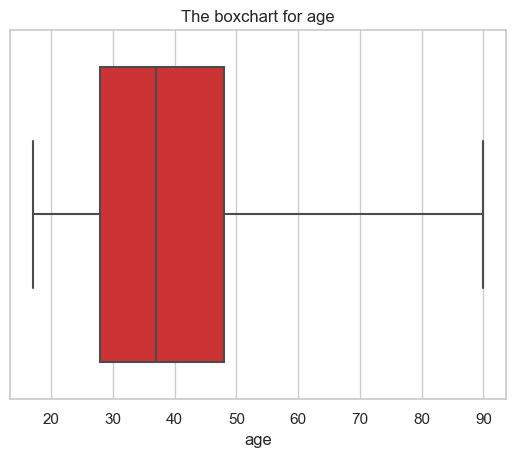

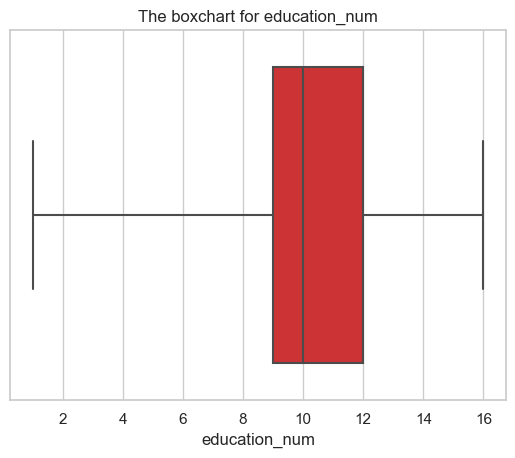

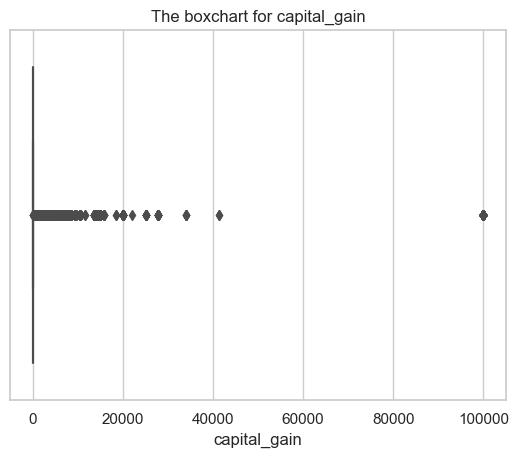

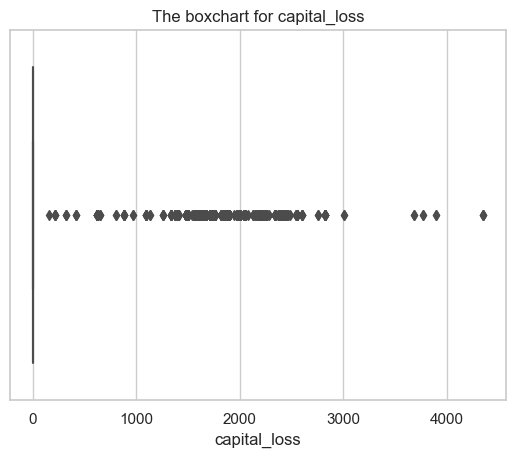

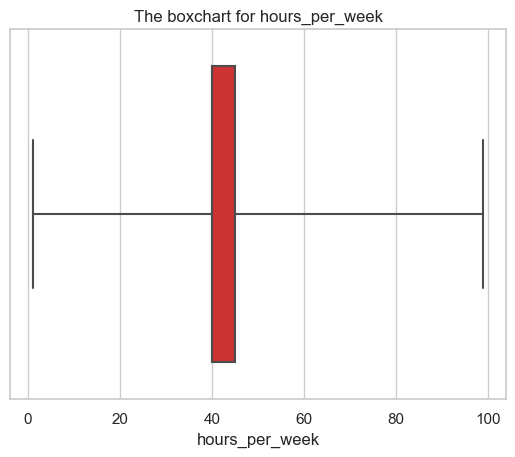

,age,workclass,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income,age_types,income_num
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,adult,0
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,adult,0
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,adult,0
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,adult,0
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,adult,0


In [55]:
#Let's check for outliers in the numerical columns

for i in numerical:
    sns.boxplot(x = df[i][1:],data=df.iloc[1:], whis=100000, order=df[i][1:].value_counts().index, palette='Set1')
    plt.title("The boxchart for {}".format(i))
    plt.show()
    
#Checking for outliers in numerical columns is an important step in 
#data exploration and preprocessing. Outliers are values in a dataset 
#that are significantly different from the majority of the other 
#values. Outliers can have a significant impact on the results of 
#statistical analysis and modeling

df.head()

In [56]:
df.head()

,age,workclass,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income,age_types,income_num
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,adult,0
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,adult,0
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,adult,0
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,adult,0
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,adult,0


We see there are few outliers in capital gain and capital loss, let's look at these plots closely

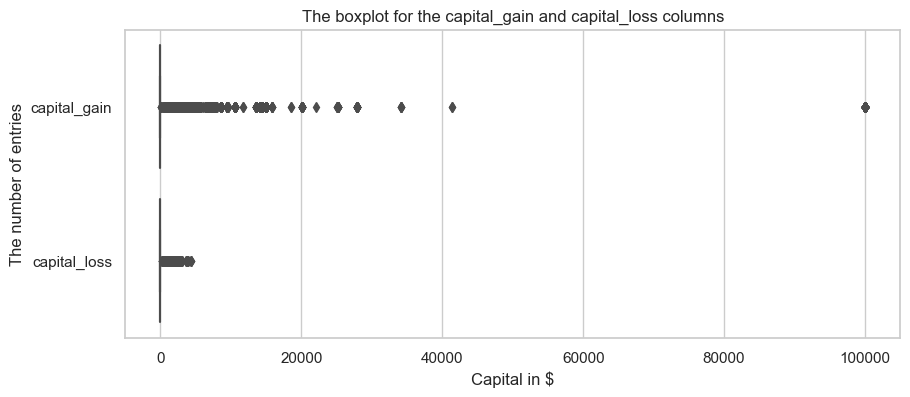

In [57]:
plt.figure(figsize=(10,4))
plt.title('The boxplot for the capital_gain and capital_loss columns')
sns.boxplot( data=df[['capital_gain','capital_loss']], orient='h')
plt.ylabel('The number of entries')
plt.xlabel('Capital in $')
plt.show()

We are dropping these outliers as it can lead to the result distortion.

In [58]:
abc = df.loc[df['capital_gain']>90000,'capital_gain'].index
df.drop(index=abc,inplace=True)

In [59]:
temp_3 = df.loc[df['capital_loss']>4000,'capital_loss'].index
df.drop(index=temp_3,inplace=True)

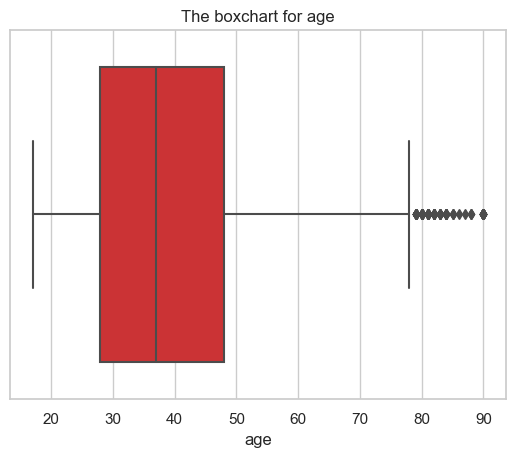

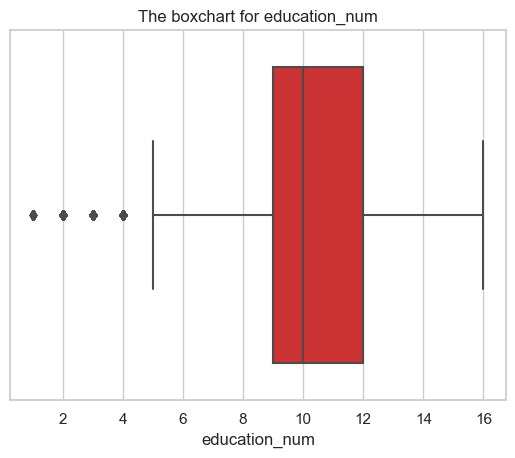

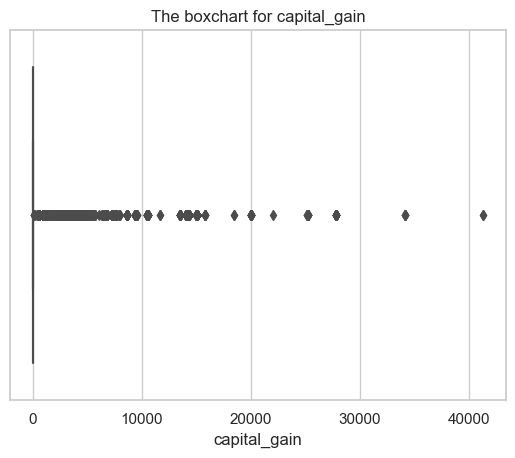

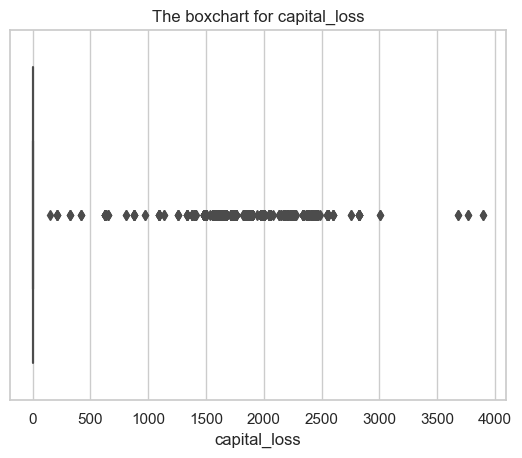

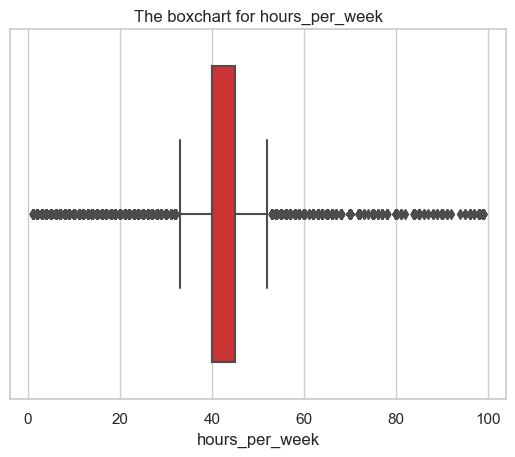

In [60]:
for i in numerical:
    sns.boxplot(x = df[i][1:],data=df.iloc[1:], order=df[i][1:].value_counts().index, palette='Set1')
    plt.title("The boxchart for {}".format(i))
    plt.show()

In [61]:
numerical

['age', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week']

/var/folders/pg/s8h1mcjj25q1n0v3sy74_tlw0000gn/T/ipykernel_16353/3422311057.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(x=df[i], palette='Set1',bins=20)


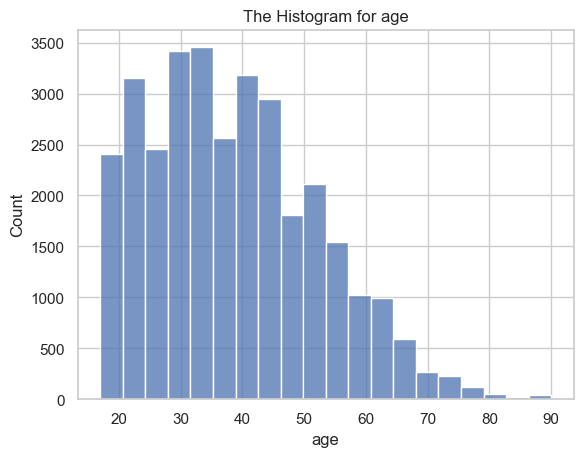

/var/folders/pg/s8h1mcjj25q1n0v3sy74_tlw0000gn/T/ipykernel_16353/3422311057.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(x=df[i], palette='Set1',bins=20)


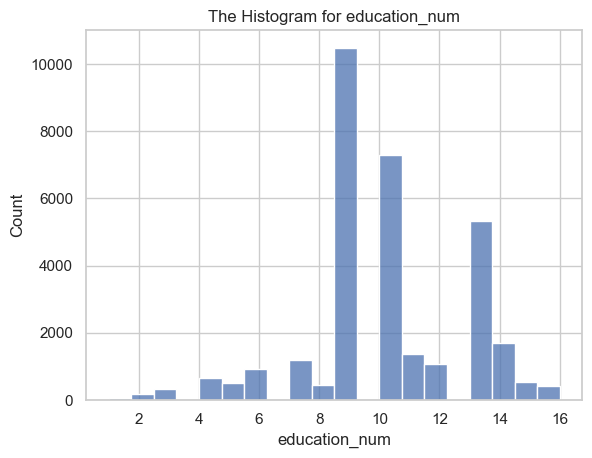

/var/folders/pg/s8h1mcjj25q1n0v3sy74_tlw0000gn/T/ipykernel_16353/3422311057.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(x=df[i], palette='Set1',bins=20)


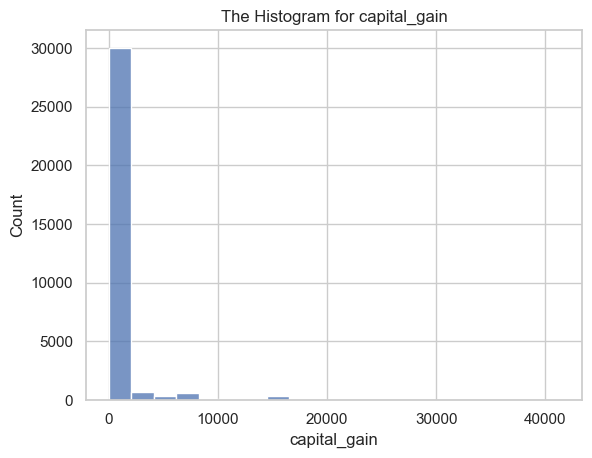

/var/folders/pg/s8h1mcjj25q1n0v3sy74_tlw0000gn/T/ipykernel_16353/3422311057.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(x=df[i], palette='Set1',bins=20)


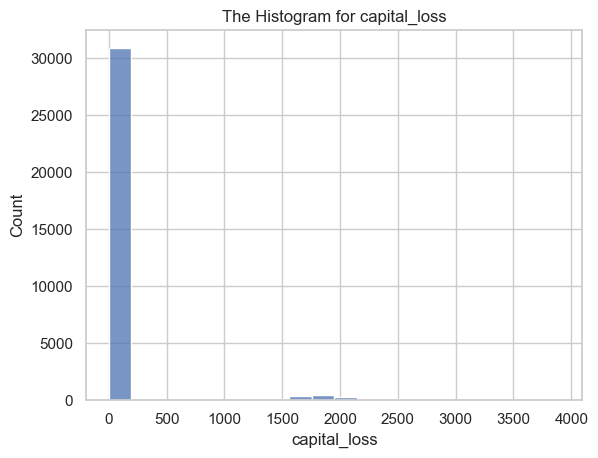

/var/folders/pg/s8h1mcjj25q1n0v3sy74_tlw0000gn/T/ipykernel_16353/3422311057.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(x=df[i], palette='Set1',bins=20)


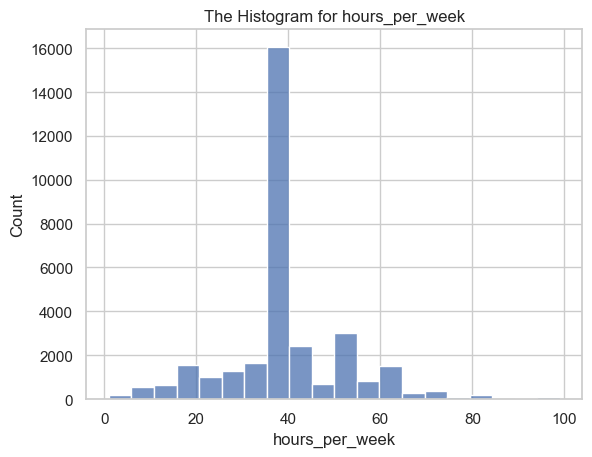

In [62]:

for i in numerical:
    sns.histplot(x=df[i], palette='Set1',bins=20)
    plt.title("The Histogram for {}".format(i))
    plt.show()


Most of the people are between 20-50 age range. The graph is rightly skewed so we need to normalize it by scaling
The majority af hours per week no more than 50 h/w, and the most value is about 40 (8 hours per day).

#### 2. Check correlation

#### Categorical Columns

In [64]:
categorical

['workclass',
 'education',
 'marital_status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native_country',
 'income']

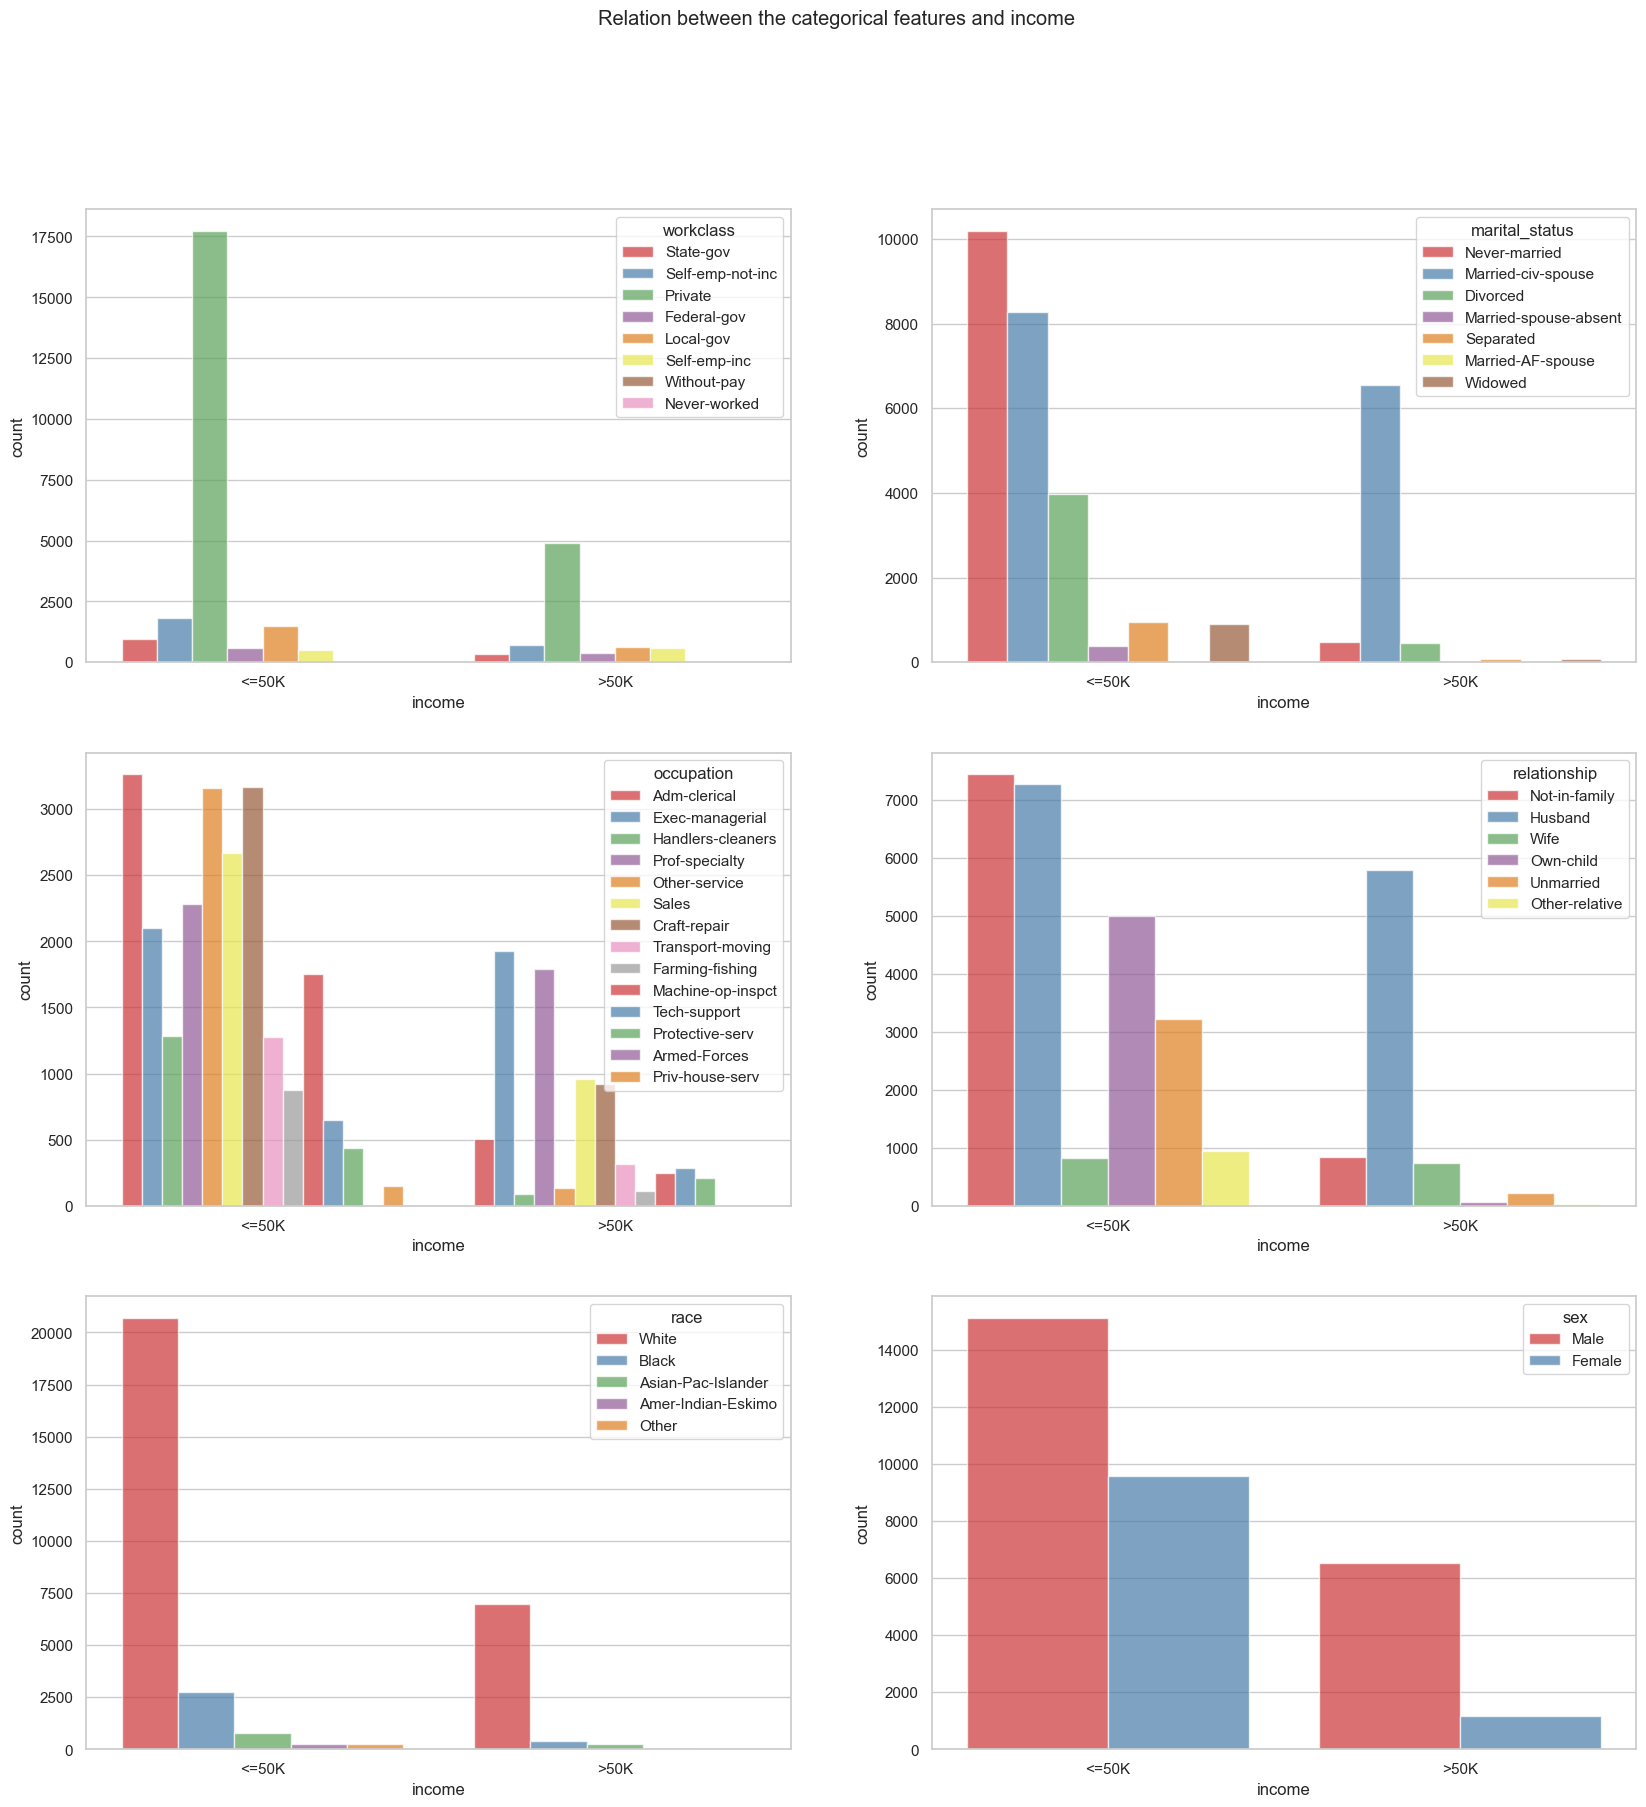

In [65]:
fig, axs = plt.subplots(3, 2, figsize=(20,20))
axs = axs.flatten() #transform multi Dimensional array to 1D
fig.suptitle('Relation between the categorical features and income')

categorical2 = ['workclass', 'marital_status','occupation','relationship','race','sex',]
for ax, i in enumerate(categorical2):
    sns.countplot(x='income', alpha=0.7, hue=i, data=df, ax=axs[ax],palette='Set1')
#alpha = transparency of the bars in the plots
#hue = creates a separete bar for each value

In categorical columns, the method of trying to find outliers is not a suitable way. A better way is to check their correlations by using corr().

/var/folders/pg/s8h1mcjj25q1n0v3sy74_tlw0000gn/T/ipykernel_16353/1579225869.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


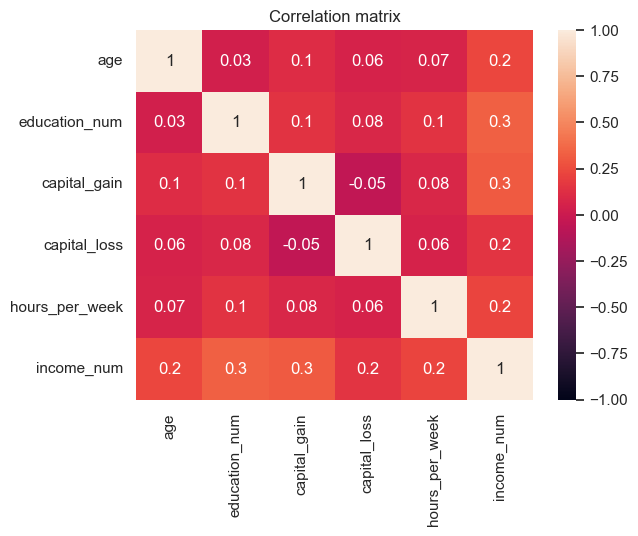

In [66]:
#compute the correlation and store in corr
corr = df.corr()

#matrix = np.triu(corr)

sns.heatmap(corr, vmax=1.0, vmin=-1.0, fmt='.1g', annot=True)
# vmax and vmin are arguments that specify the maximum and minimum 
#values to be used in the color scale of the heatmap

plt.title('Correlation matrix')
plt.show()

This correlation matrix visualizes the relationships between different variables like age, education, capital gains, losses, hours per week, and income. Darker red indicates stronger positive correlations. 

Based on the correlation matrix alone, no columns necessarily need to be dropped

In [67]:
#Let's drop the income columns since now we are about to predict their incomes based on other data such as age, race, education...
X = df.drop(columns='income')
y = df['income']

### Data Label Encoding

This encoder is typically used for converting categorical data into a format that can be used by machine learning algorithms—specifically, it transforms each unique string value into a numeric value.

In [68]:
from sklearn.preprocessing import LabelEncoder

In [69]:
#create a function that takes a string 
def label_encoder(a):
    #call this function from sklearn and store as le
    le = LabelEncoder()
    #Fit the encoder or train
    df[a] = le.fit_transform(df[a])

In [70]:
df.columns

Index(['age', 'workclass', 'education', 'education_num', 'marital_status',
       'occupation', 'relationship', 'race', 'sex', 'capital_gain',
       'capital_loss', 'hours_per_week', 'native_country', 'income',
       'age_types', 'income_num'],
      dtype='object')

In [71]:
label_list = ['workclass', 'education','marital_status',
       'occupation', 'relationship', 'race', 'sex','native_country', 'income']
#encode all using a loop
for i in label_list:
    label_encoder(i)

In [72]:
df.head()

,age,workclass,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income,age_types,income_num
0,39,6,9,13,4,0,1,4,1,2174,0,40,38,0,adult,0
1,50,5,9,13,2,3,0,4,1,0,0,13,38,0,adult,0
2,38,3,11,9,0,5,1,4,1,0,0,40,38,0,adult,0
3,53,3,1,7,2,5,0,2,1,0,0,40,38,0,adult,0
4,28,3,9,13,2,9,5,2,0,0,0,40,4,0,adult,0


You can see that the dataset now is all numerical!

### Data normalisation

The code uses a tool called MinMaxScaler to adjust the data so that all the values are between 0 and 1. It first removes columns not needed for scaling, calculates the new scaled values, and then puts these scaled values into a new table called df_scaled. This helps make sure all data points are treated equally when analysing them.

In [73]:
from sklearn.preprocessing import MinMaxScaler

In [74]:
#call function and store as scaler
scaler = MinMaxScaler()

In [75]:
df.head()

,age,workclass,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income,age_types,income_num
0,39,6,9,13,4,0,1,4,1,2174,0,40,38,0,adult,0
1,50,5,9,13,2,3,0,4,1,0,0,13,38,0,adult,0
2,38,3,11,9,0,5,1,4,1,0,0,40,38,0,adult,0
3,53,3,1,7,2,5,0,2,1,0,0,40,38,0,adult,0
4,28,3,9,13,2,9,5,2,0,0,0,40,4,0,adult,0


In [76]:
scaler.fit(df.drop(['income','age_types','income_num'],axis=1))

MinMaxScaler()

In [77]:
#create a new scaled data with 3 columns droped
scaled_features = scaler.transform(df.drop(['income','age_types','income_num'],axis=1))

In [78]:
df.columns

Index(['age', 'workclass', 'education', 'education_num', 'marital_status',
       'occupation', 'relationship', 'race', 'sex', 'capital_gain',
       'capital_loss', 'hours_per_week', 'native_country', 'income',
       'age_types', 'income_num'],
      dtype='object')

In [79]:
columns=['age', 'workclass', 'education', 'education_num', 'marital_status',
       'occupation', 'relationship', 'race', 'sex', 'capital_gain',
       'capital_loss', 'hours_per_week', 'native_country']

In [80]:
#create a new df with the scaled df and add the columns names
df_scaled = pd.DataFrame(scaled_features,columns=columns)
df_scaled.head()

,age,workclass,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country
0,0.301370,0.750,0.600000,0.800000,0.666667,0.000000,0.2,1.0,1.0,0.052626,0.0,0.397959,0.926829
1,0.452055,0.625,0.600000,0.800000,0.333333,0.214286,0.0,1.0,1.0,0.000000,0.0,0.122449,0.926829
2,0.287671,0.375,0.733333,0.533333,0.000000,0.357143,0.2,1.0,1.0,0.000000,0.0,0.397959,0.926829
3,0.493151,0.375,0.066667,0.400000,0.333333,0.357143,0.0,0.5,1.0,0.000000,0.0,0.397959,0.926829
4,0.150685,0.375,0.600000,0.800000,0.333333,0.642857,1.0,0.5,0.0,0.000000,0.0,0.397959,0.097561


### Handle imbalanced dataset

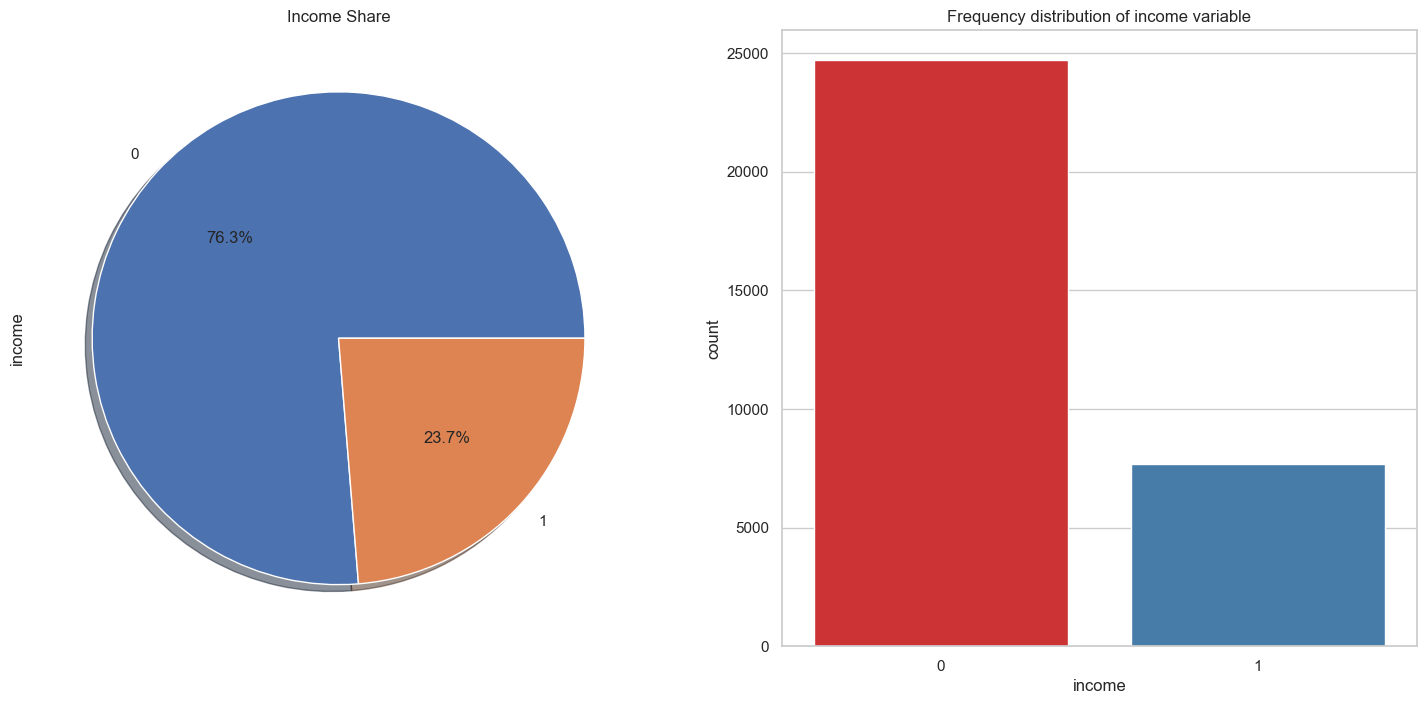

In [81]:
f,ax=plt.subplots(1,2,figsize=(18,8))

ax[0] = df['income'].value_counts().plot.pie(explode=[0,0],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Income Share')


#f, ax = plt.subplots(figsize=(6, 8))
ax[1] = sns.countplot(x="income", data=df, palette="Set1")
ax[1].set_title("Frequency distribution of income variable")

plt.show()

#### 1.Using over sampling method to balance

To address an imbalanced dataset, we use SMOTETomek, a technique that combines over-sampling and under-sampling methods. It balances the classes by increasing the minority class size and reducing the majority class size to create an even distribution, as demonstrated by the final counts of each class.

In [82]:
df.head()

,age,workclass,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income,age_types,income_num
0,39,6,9,13,4,0,1,4,1,2174,0,40,38,0,adult,0
1,50,5,9,13,2,3,0,4,1,0,0,13,38,0,adult,0
2,38,3,11,9,0,5,1,4,1,0,0,40,38,0,adult,0
3,53,3,1,7,2,5,0,2,1,0,0,40,38,0,adult,0
4,28,3,9,13,2,9,5,2,0,0,0,40,4,0,adult,0


In [83]:
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import NearMiss

In [84]:
X = df_scaled
y= df.income

In [85]:
# Implementing Oversampling for Handling Imbalanced 
smk = SMOTETomek(random_state=42)
X_res,y_res=smk.fit_resample(X,y)

In [86]:
X_res.shape,y_res.shape

((48186, 13), (48186,))

In [87]:
from collections import Counter
print('Original dataset shape {}'.format(Counter(y)))
print('Resampled dataset shape {}'.format(Counter(y_res)))

Original dataset shape Counter({0: 24717, 1: 7682})
Resampled dataset shape Counter({0: 24093, 1: 24093})


#### 2. Split the dataset into train dataset and test dataset

In [88]:
from sklearn.model_selection import train_test_split

In [89]:
#split data with shuffle (20% test 80% train)
X_train, X_test, y_train, y_test = train_test_split(X_res,y_res,test_size=0.20,random_state=101,shuffle=True)
#shuffles the data before splitting it into training and testing sets.

In [90]:
print("X_train shape:",X_train.shape)
print("X_test shape:",X_test.shape)
print("y_train shape:",y_train.shape)
print("y_test shape:",y_test.shape)

X_train shape: (38548, 13)
X_test shape: (9638, 13)
y_train shape: (38548,)
y_test shape: (9638,)


In [91]:
# To store results of models
result_dict_train = {}
result_dict_test = {}

### Build Machine Learning model

#### Model 1: SVC

Let's use support Vector Machine (SVM) classifier to train and evaluate a model with cross-validation. It measures the model's performance on both training and test datasets, storing the scores for analysis.

In [92]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

svc = SVC(random_state = 101)
accuracies = cross_val_score(svc, X_train, y_train, cv=5)
svc.fit(X_train,y_train)

print("Train Score:",np.mean(accuracies))
print("Test Score:",svc.score(X_test,y_test))

Train Score: 0.8333765997564792
Test Score: 0.8383482050217888


In [93]:
result_dict_train["SVM Default Train Score"] = np.mean(accuracies)
result_dict_test["SVM Default Test Score"] = svc.score(X_test,y_test)

#### Model 2. Naive Bayes

This trains and evaluates a Bernoulli Naive Bayes model using cross-validation on the training set. It then tests the model and stores both training and testing performance scores.

In [94]:
from sklearn.naive_bayes import GaussianNB, BernoulliNB
classifier = BernoulliNB()
accuracies = cross_val_score(classifier, X_train, y_train, cv=5)
classifier.fit(X_train, y_train)

print("Train Score:",np.mean(accuracies))
print("Test Score:",classifier.score(X_test,y_test))

Train Score: 0.7431513084829008
Test Score: 0.7617763021373729


In [95]:
result_dict_train["Naive Bayes Default Train Score"] = np.mean(accuracies)
result_dict_test["Naive Bayes Default Test Score"] = classifier.score(X_test,y_test)

#### Model 3. Logistic Regression

This model uses a Logistic Regression model, setting a high iteration limit to ensure convergence. It evaluates the model's performance through 5-fold cross-validation on the training data, then fits the model and assesses its accuracy on a test set.

In [96]:
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression(max_iter=5000)
accuracies = cross_val_score(lr_model, X_train, y_train, cv=5)
lr_model.fit(X_train, y_train)

print("Train Score:",np.mean(accuracies))
print("Test Score:",lr_model.score(X_test,y_test))

Train Score: 0.7757081848342404
Test Score: 0.7810749118074289


In [97]:
result_dict_train["Logistic regression Default Train Score"] = np.mean(accuracies)
result_dict_test["Logistic regression Default Test Score"] = lr_model.score(X_test,y_test)

### Compare results of 3 models built

In [98]:
print(result_dict_train)

{'SVM Default Train Score': 0.8333765997564792, 'Naive Bayes Default Train Score': 0.7431513084829008, 'Logistic regression Default Train Score': 0.7757081848342404}


In [99]:
print(result_dict_test)

{'SVM Default Test Score': 0.8383482050217888, 'Naive Bayes Default Test Score': 0.7617763021373729, 'Logistic regression Default Test Score': 0.7810749118074289}


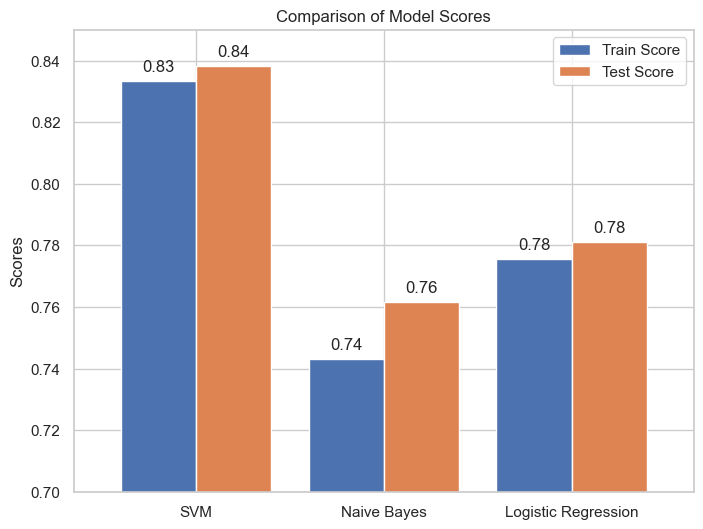

In [102]:
#Prepare the data
results = {
    'Train Score': [0.8333765997564792, 0.7431513084829008, 0.7757081848342404],
    'Test Score': [0.8383482050217888, 0.7617763021373729, 0.7810749118074289]
}

resultsdf = pd.DataFrame(results, index=['SVM', 'Naive Bayes', 'Logistic Regression'])

# Plotting
ax = resultsdf.plot.bar(rot=0, figsize=(8, 6), width=0.8)
ax.set_ylabel('Scores')
ax.set_title('Comparison of Model Scores')
ax.set_ylim(0.7, 0.85)  # Adjust the y-axis limits if necessary

# Annotate the bars
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()

This bar chart compares the training and testing scores of three machine learning models: SVM, Naive Bayes, and Logistic Regression, showing SVM performs best on test data.